## Exercise: Descriptive Statistics

In this notebook, we will investigate and examine data from the stock market, focusing on technology stock, such as Apple for example. In this exercise, we'll use the `pandas`, `numpy`, and `matplotlib` libraries, and will cover concepts like expectance, rolling mean, and visualization of the data. We will learn how to utilize `yfinance` to obtain stock information and visualize various aspects of the data with Seaborn and Matplotlib.

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?\
2.) What was the daily return of the stock on average?\
3.) What was the moving average of the various stocks?

### Data Preparation

The initial step involves acquiring the data and loading it into memory. We will obtain our stock information from the Yahoo Finance website, which is a valuable source of financial market data and provides tools for discovering attractive investments. To extract data from Yahoo Finance, we will employ the `yfinance` library, which presents a threaded and Python-friendly approach for downloading market data.

In [ ]:
!pip install pandas yfinance matplotlib seaborn pandas-datareader setuptools # install required packages

1. Import necessary libraries: `pandas`, `yfinance`, and `matplotlib`.
2. Load the stock data for a specific company (e.g. Apple Inc.) using the `yfinance` library.

In [2]:
import pandas as pd

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

# The tech stock we will use for this analysis
company = 'AAPL'

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

apple_stock_data = yf.download(company, start, end)

[*********************100%%**********************]  1 of 1 completed


In [21]:
apple_stock_data.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-22,171.759995,173.050003,170.059998,172.279999,172.279999,71106600
2024-03-25,170.570007,171.940002,169.449997,170.850006,170.850006,54288300
2024-03-26,170.000000,171.419998,169.580002,169.710007,169.710007,57388400
2024-03-27,170.410004,173.600006,170.110001,173.309998,173.309998,60273300
2024-03-28,171.750000,172.229996,170.509995,171.479996,171.479996,65672700
2024-04-01,171.190002,171.250000,169.479996,170.029999,170.029999,46240500
2024-04-02,169.080002,169.339996,168.229996,168.839996,168.839996,49329500
2024-04-03,168.789993,170.679993,168.580002,169.649994,169.649994,47691700
2024-04-04,170.289993,171.919998,168.820007,168.820007,168.820007,53704400


Play with code by running it, and experiment with different stock tickers and date ranges.

In [5]:
company = 'MSFT'

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

microsoft_stock_data = yf.download(company, start, end)

microsoft_stock_data.tail(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-01,423.950012,427.890015,422.220001,424.570007,424.570007,16316000
2024-04-02,420.109985,422.380005,417.839996,421.440002,421.440002,17912000
2024-04-03,419.730011,423.260010,419.089996,420.450012,420.450012,16502300
2024-04-04,424.989990,428.670013,417.570007,417.880005,417.880005,19370900
2024-04-05,420.010010,426.510010,418.320007,425.519989,425.519989,16544300


### Descriptive Statistics about the Data

The `.describe()` function produces summary statistics, which encompass central tendency, dispersion, and the form of a dataset's distribution, excluding any `NaN` values. It examines numeric and object series, as well as DataFrame columns containing mixed data types. The resulting output depends on the input provided.

1. Display the first few rows of the dataset using `head()` function.

In [6]:
apple_stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-10,161.419998,162.029999,160.080002,162.029999,161.169724,47716900
2023-04-11,162.350006,162.360001,160.509995,160.800003,159.946259,47644200
2023-04-12,161.220001,162.059998,159.779999,160.100006,159.249985,50133100
2023-04-13,161.630005,165.800003,161.419998,165.559998,164.680969,68445600
2023-04-14,164.589996,166.320007,163.820007,165.210007,164.332840,49386500


2.  Check for missing values and handle them if needed.

First, check for missing values in the dataset using the `isnull()` function and `sum()` to count the number of missing values in each column.

In [7]:
missing_values = apple_stock_data.isnull().sum()

print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


3.  Calculate the basic descriptive statistics for the dataset (e.g., mean, median, standard deviation, etc.).

Use the `describe()` function to calculate the basic descriptive statistics for the dataset.

In [9]:
apple_stock_data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,180.937840,182.382520,179.599400,181.069720,180.627841,5.741453e+07
std,9.156750,9.027923,9.087008,9.062210,9.107712,1.727050e+07
min,161.220001,162.029999,159.779999,160.100006,159.249985,2.404830e+07
25%,173.152496,174.432503,171.982506,173.592506,173.215370,4.682475e+07
50%,180.769997,182.284996,178.760002,180.730003,180.240234,5.353515e+07
75%,189.312500,189.990005,187.737499,189.352497,188.939705,6.221395e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


Additionally, you can calculate individual statistics for specific columns, such as the closing price:

In [11]:
mean_close_price = apple_stock_data['Close'].mean()
median_close_price = apple_stock_data['Close'].median()
std_close_price = apple_stock_data['Close'].std()

print("Mean closing price:", mean_close_price)
print("Median closing price:", median_close_price)
print("Standard deviation of closing price:", std_close_price)

Mean closing price: 181.0697202758789
Median closing price: 180.7300033569336
Standard deviation of closing price: 9.06220952984331


### Information About the Data

`.info()` method prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage.

In [13]:
apple_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-04-10 to 2024-04-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


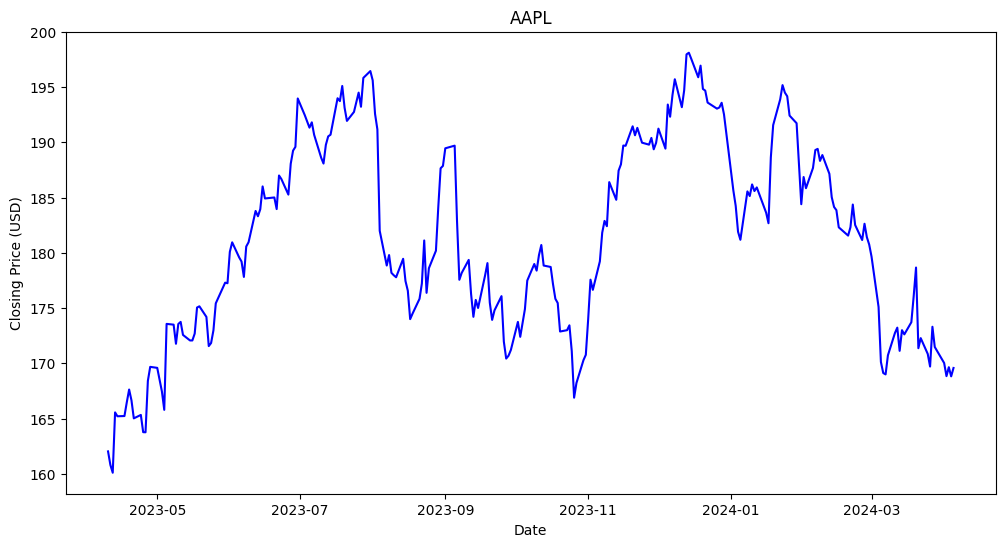

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(apple_stock_data.index, apple_stock_data['Close'], color='blue', label='Closing Price')

plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('AAPL')

plt.show()


### Volume of sales

Trading volume represents the quantity of an asset or security exchanged during a specific time frame, frequently within a day. For example, the daily trading volume of a stock refers to the total number of shares transacted between its opening and closing times. Fluctuations in trading volume over time are significant factors for technical traders to consider.

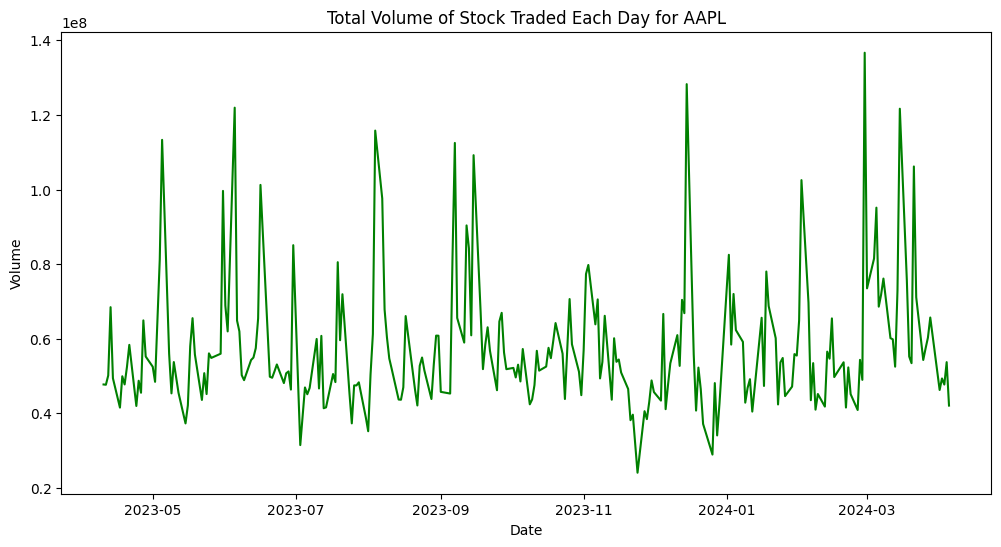

In [24]:
plt.figure(figsize=(12, 6))

plt.plot(apple_stock_data.index, apple_stock_data['Volume'], color='green', label='Volume Traded')

plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Total Volume of Stock Traded Each Day for AAPL')

plt.show()    

## Expectation

In probability theory and statistics, the expectation (or expected value) of a random variable is a measure of the "central tendency" of the distribution of that variable. It is the weighted average of all possible values that the random variable can take on, with the weights being the respective probabilities of those values.

If you have a discrete random variable, the expectation can be computed using the following formula:

E(X) = Σ \[x\_i \* P(x\_i)\]

where x\_i represents the possible values of the random variable X, and P(x\_i) is the probability of each value x\_i.

For a continuous random variable, the expectation is calculated using an integral:

E(X) = ∫ x \* f(x) dx

where x represents the possible values of the random variable X, and f(x) is the probability density function (PDF) of X.

In practice, if you have a dataset of observed values and you want to compute the expectation, you can approximate it by calculating the mean (average) of the values, assuming that each observed value is equally likely.

In the context of stock prices, expectance is the weighted average of all possible values that the stock's closing price can take on. Expectance is important in reinforcement learning because it helps estimate the expected future rewards or values, which in turn aids in the decision-making process. In finance, expectance can give an idea of the long-term average value of a stock, considering all possible outcomes.

1.  Calculate the expectance of the stock's closing price.

In this case, since we don't have probabilities associated with each closing price, we can assume that all the closing prices are equally likely. Thus, the expectance can be approximated by the mean closing price.

In [25]:
expectance_close_price = apple_stock_data['Close'].mean()
print("Expectance of the closing price:", expectance_close_price)

Expectance of the closing price: 181.0697202758789


3.  Calculate the expectance for a specific time range (e.g., last 30 days).

To calculate the expectance for the last 30 days, first, filter the dataset to include only the last 30 trading days. Then, calculate the mean closing price for this filtered dataset. Use `.iloc[-number_of_days:]` function

In [27]:
last_30_days = apple_stock_data.iloc[-30:]

expectance_last_30_days = last_30_days['Close'].mean()
print("Expectance of the closing price for the last 30 days:", expectance_last_30_days)

Expectance of the closing price for the last 30 days: 173.6443333943685


## Rolling mean - moving average

The rolling mean, or moving average, is a technique used to smooth out time series data by calculating the average of a fixed-size window of data points as it moves along the time axis. The rolling mean helps reduce noise and random fluctuations in the data, making it easier to identify trends and patterns. It's widely used in finance to analyze stock prices, as well as in reinforcement learning to track the performance of an agent over time.

1.  Calculate the rolling mean for the stock's closing price with different window sizes (e.g., 7, 14, and 30 days).

To calculate the rolling mean, use the `rolling()` function on the 'Close' column of the stock data with different window sizes and then apply the `mean()` function.

In [28]:
# Calculate rolling means with window sizes of 7, 14, and 30 days - note that rolling mean for 14 and 30 days is missing
rolling_mean_7 = apple_stock_data['Close'].rolling(window=7).mean()
rolling_mean_14 = apple_stock_data['Close'].rolling(window=14).mean()
rolling_mean_30 = apple_stock_data['Close'].rolling(window=30).mean()

# Add rolling means as new columns to the DataFrame
apple_stock_data['Rolling Mean 7'] = rolling_mean_7
apple_stock_data['Rolling Mean 14'] = rolling_mean_14
apple_stock_data['Rolling Mean 30'] = rolling_mean_30

# Display the first few rows of the dataset with the new columns
print(apple_stock_data.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-01  171.190002  171.250000  169.479996  170.029999  170.029999   
2024-04-02  169.080002  169.339996  168.229996  168.839996  168.839996   
2024-04-03  168.789993  170.679993  168.580002  169.649994  169.649994   
2024-04-04  170.289993  171.919998  168.820007  168.820007  168.820007   
2024-04-05  169.589996  170.389999  168.949997  169.580002  169.580002   

              Volume  Rolling Mean 7  Rolling Mean 14  Rolling Mean 30  
Date                                                                    
2024-04-01  46240500      171.290000       172.677143       175.433333  
2024-04-02  49329500      170.928571       172.363571       174.984333  
2024-04-03  47691700      170.552856       172.257856       174.587333  
2024-04-04  53704400      170.262857       171.959285       174.137333  
2024-04-05  42055200      170.244284       

## Data visualization

The closing market price refers to the last recorded trading price of a stock during the normal trading hours. Investors commonly utilize this price as a standard measure to evaluate the stock's performance throughout a specific time frame. Use 'Adj Close' for plotting this price

1.  Plot the stock's closing price over time.

To plot the stock's closing price over time, use the `plot()` function from the `matplotlib.pyplot` library on the 'Close' column of the stock data.

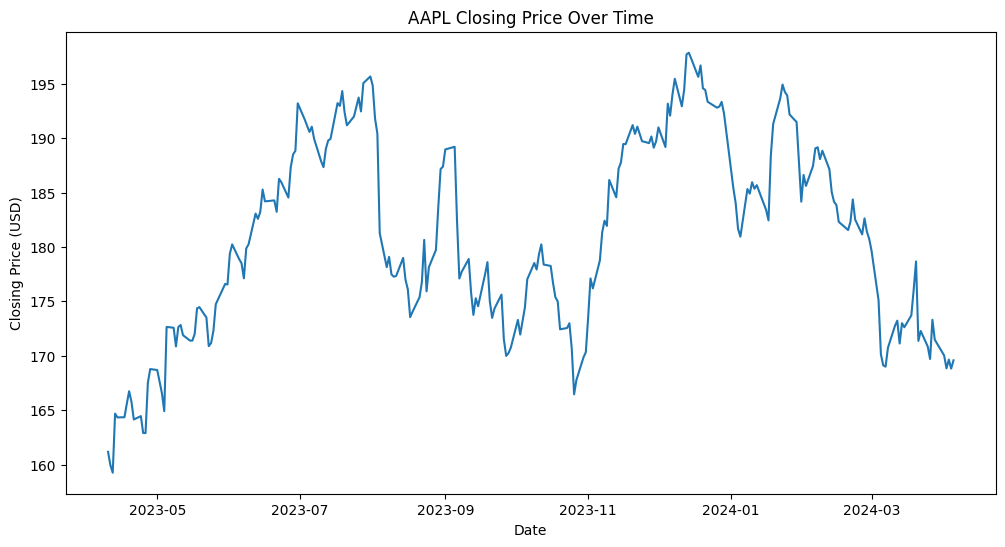

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(apple_stock_data.index, apple_stock_data['Adj Close'])

plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('AAPL Closing Price Over Time')

plt.show()

2.  Overlay the rolling mean with different window sizes on the closing price plot.

To overlay the rolling mean with different window sizes on the closing price plot, simply add the rolling mean columns to the existing plot.

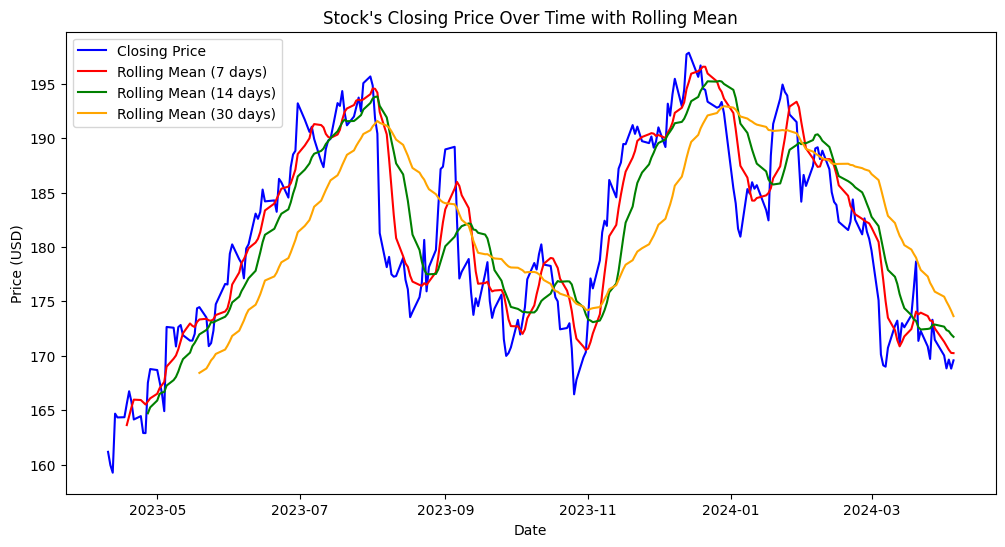

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(apple_stock_data.index, apple_stock_data['Adj Close'], color='blue', label='Closing Price')

plt.plot(apple_stock_data.index, apple_stock_data['Rolling Mean 7'], color='red', label='Rolling Mean (7 days)')
plt.plot(apple_stock_data.index, apple_stock_data['Rolling Mean 14'], color='green', label='Rolling Mean (14 days)')
plt.plot(apple_stock_data.index, apple_stock_data['Rolling Mean 30'], color='orange', label='Rolling Mean (30 days)')

plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Stock\'s Closing Price Over Time with Rolling Mean')
plt.legend()

plt.show()


### What was the daily return of the stock on average?

It's time to delve further into the stock's risk assessment. To accomplish this, we must examine the stock's daily fluctuations rather than solely focusing on its absolute value. We will proceed by employing pandas to obtain the daily returns for Apple's stock. Use company `pct_change()` to calculate and plot `'Daily Return'`

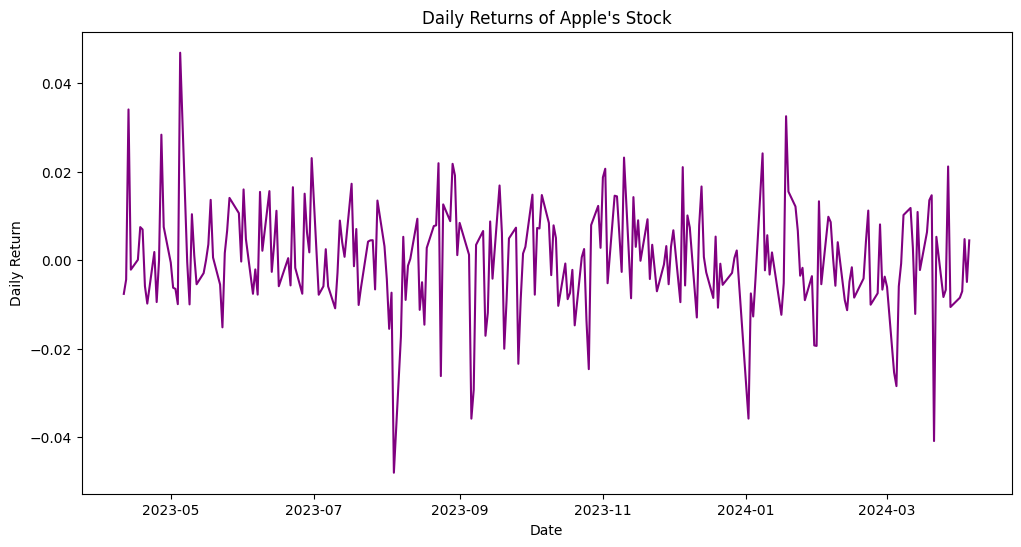

In [38]:
# We'll use pct_change to find the percent change for each day
apple_stock_data['Daily Return'] = apple_stock_data['Adj Close'].pct_change()
plt.figure(figsize=(12, 6))

plt.plot(apple_stock_data.index, apple_stock_data['Daily Return'], color='purple')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Returns of Apple\'s Stock')

plt.show()

Use histogram to take a look at the average daily return - use `hist()` function with 50 bins.

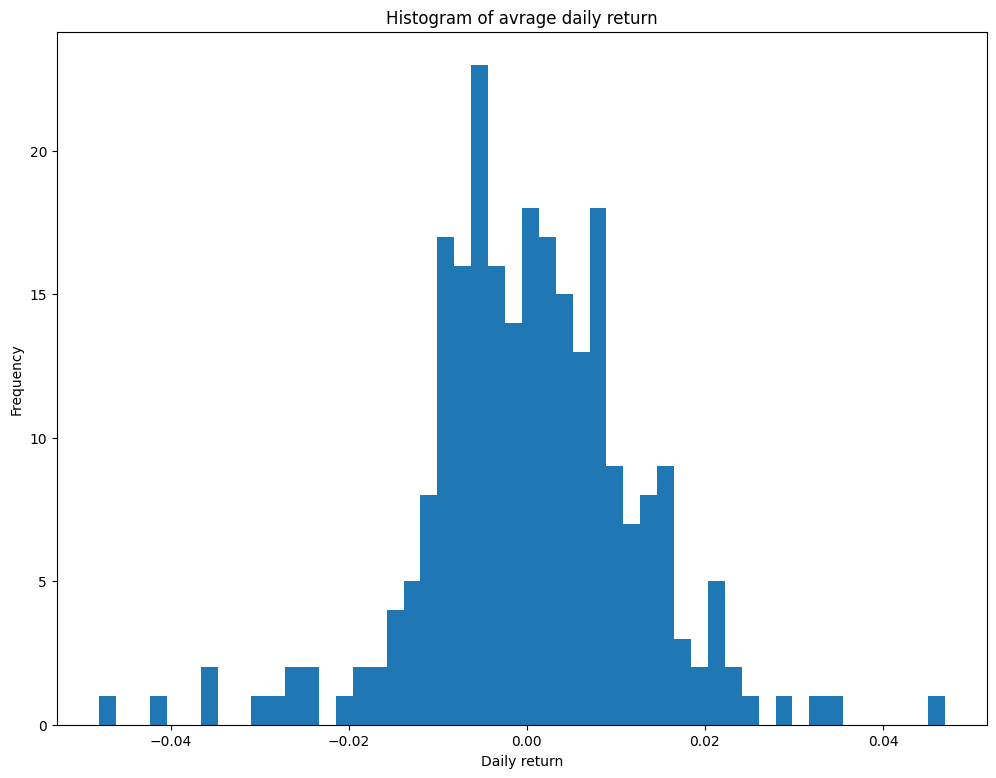

In [45]:
plt.figure(figsize=(12, 9))

plt.hist(apple_stock_data['Daily Return'], bins=50)

plt.xlabel('Daily return')
plt.ylabel('Frequency')
plt.title('Histogram of avrage daily return')

plt.show()

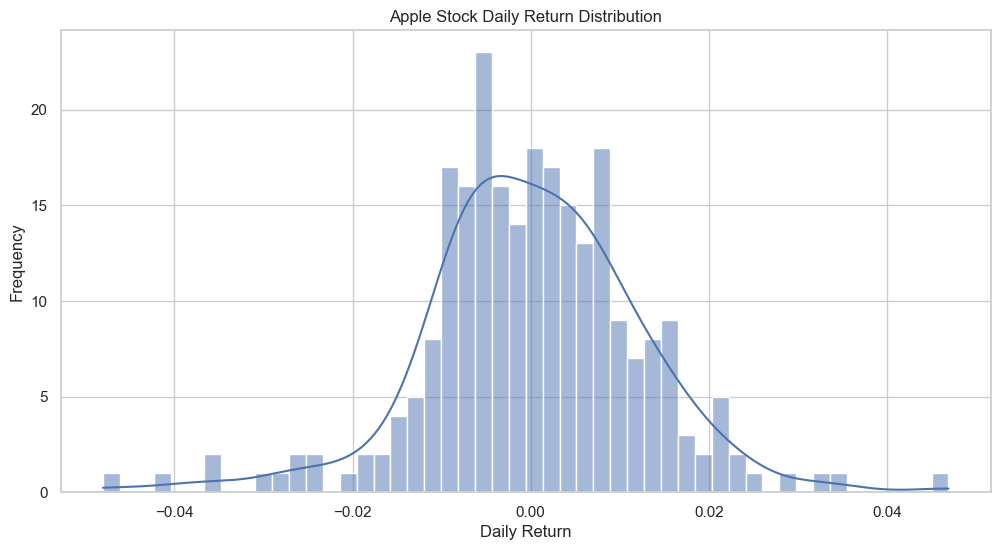

In [46]:
import seaborn as sns

# Set the style and size of the plot
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 6))

# Plot the histogram and KDE
sns.histplot(apple_stock_data['Daily Return'], kde=True, bins=50)

# Add labels and title
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Apple Stock Daily Return Distribution')

# Show the plot
plt.show()
